<a href="https://colab.research.google.com/github/dbonekamp/imageProcessingAndR/blob/main/Basic_R_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%load_ext rpy2.ipython

In [5]:
# prompt: give me a tutorial on basic usage of R

# Install R in Colab
#!apt-get install -y r-base

%%R

# Basic R commands
print("Hello from R!")

# Create a vector
my_vector <- c(1, 2, 3, 4, 5)
print(my_vector)

# Create a matrix
my_matrix <- matrix(1:12, nrow = 3, ncol = 4)
print(my_matrix)

# Create a data frame
my_data <- data.frame(
  name = c("Alice", "Bob", "Charlie"),
  age = c(25, 30, 28),
  city = c("New York", "London", "Paris")
)
print(my_data)

# Access data frame columns
print(my_data$name)

# Summary statistics
summary(my_data$age)

# Plotting
#plot(my_data$age, my_data$name)


[1] "Hello from R!"
[1] 1 2 3 4 5
     [,1] [,2] [,3] [,4]
[1,]    1    4    7   10
[2,]    2    5    8   11
[3,]    3    6    9   12
     name age     city
1   Alice  25 New York
2     Bob  30   London
3 Charlie  28    Paris
[1] "Alice"   "Bob"     "Charlie"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  25.00   26.50   28.00   27.67   29.00   30.00 


In [6]:
# prompt: Give a list of available r datasets

%%R
data()


File: /tmp/Rtmp2LKOEn/RpackageIQR70e789c6dab
Data sets in package ‘datasets’:



AirPassengers           Monthly Airline Passenger Numbers 1949-1960

BJsales                 Sales Data with Leading Indicator

BJsales.lead (BJsales)

                        Sales Data with Leading Indicator

BOD                     Biochemical Oxygen Demand

CO2                     Carbon Dioxide Uptake in Grass Plants

ChickWeight             Weight versus age of chicks on different diets

DNase                   Elisa assay of DNase

EuStockMarkets          Daily Closing Prices of Major European Stock

                        Indices, 1991-1998

Formaldehyde            Determination of Formaldehyde

HairEyeColor            Hair and Eye Color of Statistics Students

Harman23.cor            Harman Example 2.3

Harman74.cor            Harman Example 7.4

Indometh                Pharmacokinetics of Indomethacin

InsectSprays            Effectiveness of Insect Sprays

JohnsonJohnson          Quarterly Earn

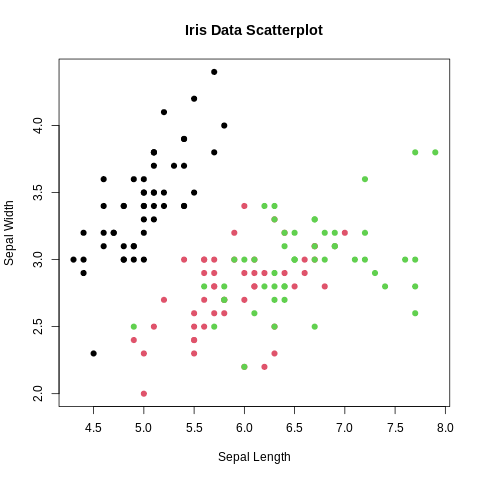

In [9]:
# prompt: use the iris data and display it graphically

%%R
data(iris)
plot(iris$Sepal.Length, iris$Sepal.Width, col = iris$Species, pch = 19,
     main = "Iris Data Scatterplot",
     xlab = "Sepal Length", ylab = "Sepal Width")


In [15]:
# prompt: print the columns of the iris dataset

%%R
print(colnames(iris))


[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"     
[6] "cluster"     


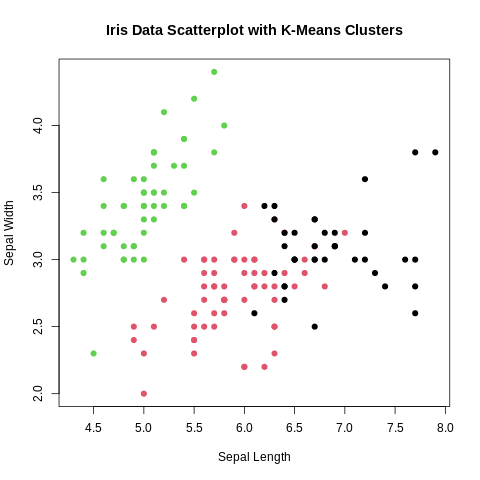

In [18]:
# prompt: perform k means clustering to separate the datapoints into classes

%%R
# Perform k-means clustering
kmeans_result <- kmeans(iris[, 1:4], centers = 3)

# Get cluster assignments
cluster_assignments <- kmeans_result$cluster

# Add cluster assignments to the iris data frame
iris$cluster <- cluster_assignments

# Plot the clustered data
plot(iris$Sepal.Length, iris$Sepal.Width, col = iris$cluster, pch = 19,
     main = "Iris Data Scatterplot with K-Means Clusters",
     xlab = "Sepal Length", ylab = "Sepal Width")


In [11]:
# prompt: show the differences between k -means prediction and ground truth, including true positive and true negative

%%R
# Create a confusion matrix
table(iris$Species, iris$cluster)

# Calculate true positives, true negatives, etc.
# Note: This requires some manual interpretation of the confusion matrix
# as the cluster assignments might not perfectly align with the species.


            
              1  2  3
  setosa      0  0 50
  versicolor 48  2  0
  virginica  14 36  0


In [22]:
# prompt: install caTools

%%R
install.packages("caTools")
install.packages("pROC")



(as ‘lib’ is unspecified)







	‘/tmp/Rtmp2LKOEn/downloaded_packages’

(as ‘lib’ is unspecified)














	‘/tmp/Rtmp2LKOEn/downloaded_packages’




Attaching package: ‘pROC’



    cov, smooth, var






Area under the curve: 0.9156


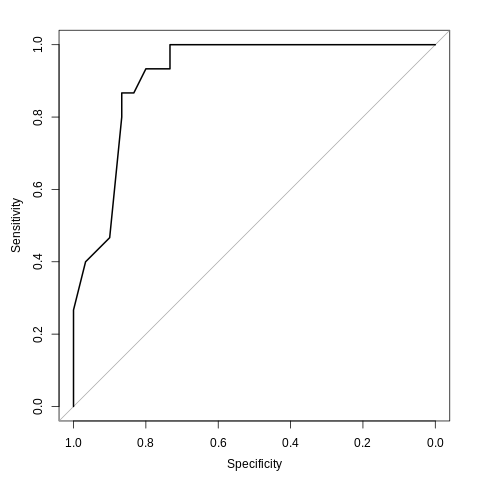

In [23]:
# prompt: Use sepal length to predict if it is setosa and perform roc analysis with ROC curve

%%R
# Create a binary variable for setosa
iris$setosa <- ifelse(iris$Species == "setosa", 1, 0)

# Split the data into training and testing sets
library(caTools)
split <- sample.split(iris$setosa, SplitRatio = 0.7)
train_data <- subset(iris, split == TRUE)
test_data <- subset(iris, split == FALSE)

# Fit a logistic regression model
model <- glm(setosa ~ Sepal.Length, data = train_data, family = binomial)

# Predict probabilities on the test data
predictions <- predict(model, newdata = test_data, type = "response")

# Create a ROC curve
library(pROC)
roc_obj <- roc(test_data$setosa, predictions)
plot(roc_obj)

# Calculate AUC
auc(roc_obj)


In [30]:
# prompt: perform k-means clustering of iris data on a training set and use the resulting clusters to predict a test set, use cl_predict

%%R
# Install necessary packages
if (!require("cluster")) install.packages("cluster")
if (!require("clue")) install.packages("clue")

# Load the iris dataset
data(iris)

# Split the data into training and testing sets
library(caTools)
split <- sample.split(iris$Species, SplitRatio = 0.2)
train_data <- subset(iris, split == TRUE)
test_data <- subset(iris, split == FALSE)

# Perform k-means clustering on the training data
kmeans_result <- kmeans(train_data[, 1:4], centers = 3)

# Get cluster assignments for the training data
train_data$cluster <- kmeans_result$cluster

# Predict clusters for the test data using cl_predict
library(cluster)
predicted_clusters <- cl_predict(kmeans_result, newdata = test_data[, 1:4])

# Add predicted clusters to the test data
test_data$predicted_cluster <- predicted_clusters

# Create a confusion matrix
table(test_data$Species, test_data$predicted_cluster)


            
              1  2  3
  setosa      0 40  0
  versicolor 30  0 10
  virginica   1  0 39


In [31]:
# prompt: calculate prediction accuracy for each cluster

%%R
# Create a confusion matrix
confusion_matrix <- table(test_data$Species, test_data$predicted_cluster)

# Calculate accuracy for each cluster
for (i in 1:nrow(confusion_matrix)) {
  cluster_total <- sum(confusion_matrix[i,])
  cluster_correct <- max(confusion_matrix[i,])
  cluster_accuracy <- cluster_correct / cluster_total
  print(paste("Accuracy for cluster", i, ":", cluster_accuracy))
}


[1] "Accuracy for cluster 1 : 1"
[1] "Accuracy for cluster 2 : 0.75"
[1] "Accuracy for cluster 3 : 0.975"
